# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
# output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# Make the API call try to limit with rate limiter or Max function
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build query URL, rate limiter not working
query_url = f"{url}appid={weather_api_key}&units={units}&q="
# rate_limiter = RateLimiter(max_calls=50, period=60)


response = requests.get(query_url + "New York")
city_data = response.json()
city_data


{'coord': {'lon': -74.01, 'lat': 40.71},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 64.04,
  'feels_like': 62.56,
  'temp_min': 62.6,
  'temp_max': 66,
  'pressure': 1021,
  'humidity': 63},
 'visibility': 10000,
 'wind': {'speed': 3.36, 'deg': 0},
 'clouds': {'all': 90},
 'dt': 1602430766,
 'sys': {'type': 1,
  'id': 5141,
  'country': 'US',
  'sunrise': 1602414194,
  'sunset': 1602454903},
 'timezone': -14400,
 'id': 5128581,
 'name': 'New York',
 'cod': 200}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | barrow
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | tiksi
Processing Record 4 of Set 1 | rawannawi
City not found. Skipping...
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | katsuura
Processing Record 7 of Set 1 | thompson
Processing Record 8 of Set 1 | constitucion
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | ciudad bolivar
Processing Record 12 of Set 1 | provideniya
Processing Record 13 of Set 1 | alofi
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | cherskiy
Processing Record 16 of Set 1 | sinkat
City not found. Skipping...
Processing Record 17 of Set 1 | port elizabeth
Processing Record 18 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 19 of Set 1 | saint-joseph
Processing Record 20 of Set 1 | victoria
Processing Record 21 of

Processing Record 36 of Set 4 | laem sing
Processing Record 37 of Set 4 | leningradskiy
Processing Record 38 of Set 4 | staryy nadym
Processing Record 39 of Set 4 | rio grande
Processing Record 40 of Set 4 | alice springs
Processing Record 41 of Set 4 | sao filipe
Processing Record 42 of Set 4 | rondonopolis
Processing Record 43 of Set 4 | pyapon
Processing Record 44 of Set 4 | san ramon
Processing Record 45 of Set 4 | paysandu
Processing Record 46 of Set 4 | bubaque
Processing Record 47 of Set 4 | emba
Processing Record 48 of Set 4 | saint george
Processing Record 49 of Set 4 | cidreira
Processing Record 0 of Set 5 | yantal
Processing Record 1 of Set 5 | yanan
City not found. Skipping...
Processing Record 2 of Set 5 | kemijarvi
Processing Record 3 of Set 5 | nizhneangarsk
Processing Record 4 of Set 5 | bogolyubovo
Processing Record 5 of Set 5 | madingou
Processing Record 6 of Set 5 | belle fourche
Processing Record 7 of Set 5 | la primavera
Processing Record 8 of Set 5 | ghanzi
Proces

Processing Record 27 of Set 8 | nueva loja
Processing Record 28 of Set 8 | jhudo
Processing Record 29 of Set 8 | sindor
Processing Record 30 of Set 8 | kahului
Processing Record 31 of Set 8 | bandundu
Processing Record 32 of Set 8 | davila
Processing Record 33 of Set 8 | hofn
Processing Record 34 of Set 8 | beloha
Processing Record 35 of Set 8 | cheyenne
Processing Record 36 of Set 8 | alyangula
Processing Record 37 of Set 8 | gallipoli
Processing Record 38 of Set 8 | qaqortoq
Processing Record 39 of Set 8 | chute-aux-outardes
Processing Record 40 of Set 8 | acapulco
Processing Record 41 of Set 8 | borogontsy
Processing Record 42 of Set 8 | riyadh
Processing Record 43 of Set 8 | inhambane
Processing Record 44 of Set 8 | yangambi
Processing Record 45 of Set 8 | kabompo
Processing Record 46 of Set 8 | gorgan
Processing Record 47 of Set 8 | loukhi
Processing Record 48 of Set 8 | avesta
Processing Record 49 of Set 8 | sibay
Processing Record 0 of Set 9 | porto novo
Processing Record 1 of S

Processing Record 15 of Set 12 | esna
Processing Record 16 of Set 12 | huanren
Processing Record 17 of Set 12 | jambi
Processing Record 18 of Set 12 | kirensk
Processing Record 19 of Set 12 | vangaindrano
Processing Record 20 of Set 12 | payyannur
Processing Record 21 of Set 12 | nieuw amsterdam
Processing Record 22 of Set 12 | bafq
Processing Record 23 of Set 12 | cortez
Processing Record 24 of Set 12 | la campana
Processing Record 25 of Set 12 | mount isa
Processing Record 26 of Set 12 | port lincoln
Processing Record 27 of Set 12 | soyo
Processing Record 28 of Set 12 | mayor pablo lagerenza
Processing Record 29 of Set 12 | cavalcante
Processing Record 30 of Set 12 | cabatuan
Processing Record 31 of Set 12 | beringovskiy
Processing Record 32 of Set 12 | piterka
Processing Record 33 of Set 12 | tabuk
Processing Record 34 of Set 12 | dargaville
Processing Record 35 of Set 12 | marsa matruh
Processing Record 36 of Set 12 | olinda
Processing Record 37 of Set 12 | fare
Processing Record 3

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,barrow,71.29,-156.79,24.80,68,90,17.22,US,1602430919
1,hermanus,-34.42,19.23,64.99,53,99,10.00,ZA,1602430959
2,tiksi,71.69,128.87,12.00,94,46,9.28,RU,1602430959
3,atuona,-9.80,-139.03,78.26,72,24,24.49,PF,1602430959
4,katsuura,35.13,140.30,68.00,88,75,13.87,JP,1602430959


In [10]:
#  Get the indices of cities that have humidity over 100%.

humidity_max = city_data_df["Humidity"].max()
humidity_max

100

In [11]:
#  Get the indices of cities that have humidity over 100%.
city_data_df[city_data_df.Humidity > 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = city_data_df[city_data_df.Humidity < 100]
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,barrow,71.29,-156.79,24.80,68,90,17.22,US,1602430919
1,hermanus,-34.42,19.23,64.99,53,99,10.00,ZA,1602430959
2,tiksi,71.69,128.87,12.00,94,46,9.28,RU,1602430959
3,atuona,-9.80,-139.03,78.26,72,24,24.49,PF,1602430959
4,katsuura,35.13,140.30,68.00,88,75,13.87,JP,1602430959
...,...,...,...,...,...,...,...,...,...
547,grindavik,63.84,-22.43,46.40,87,75,6.93,IS,1602430999
548,westport,41.14,-73.36,66.20,52,1,11.41,US,1602430742
549,richards bay,-28.78,32.04,62.53,71,100,7.05,ZA,1602430999
550,udalguri,26.77,92.13,79.02,80,3,3.44,IN,1602430999


In [13]:
# Max humidity columns greate than 100 have been removed

humidity_max = clean_city_data["Humidity"].max()
humidity_max

99

In [14]:
# Export csv file
clean_city_data.to_csv('clean_city_data.csv')
# clean_city_data.to_csv('clean_city_data.csv', index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<Figure size 432x288 with 0 Axes>

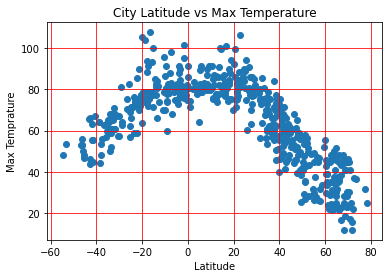

In [15]:
# PLOT DATA FROM ABOVE REFER TO CLASS WORK WEEK 6 COPY THIS EXAMPLE FOR OTHER PLOTS BELOW TO MAKE EASIER

plt.figure(facecolor=(1, 1, 1))
fig = plt.figure()
fig.patch.set_facecolor
plt.scatter(clean_city_data["Lat"],clean_city_data["Max Temp"] )
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Max Temprature")
plt.xlabel("Latitude")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="red")

## Latitude vs. Humidity Plot

<Figure size 432x288 with 0 Axes>

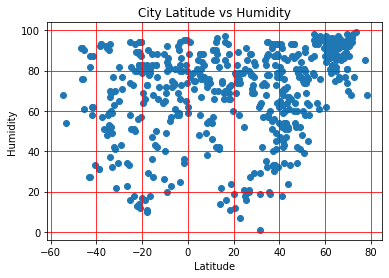

In [16]:
# PLOT DATA FROM ABOVE REFER TO CLASS WORK WEEK 6 COPY THIS EXAMPLE FOR OTHER PLOTS BELOW TO MAKE EASIER

plt.figure(facecolor=(1, 1, 1))
fig = plt.figure()
fig.patch.set_facecolor
plt.scatter(clean_city_data["Lat"],clean_city_data["Humidity"] )
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="red")

## Latitude vs. Cloudiness Plot

<Figure size 432x288 with 0 Axes>

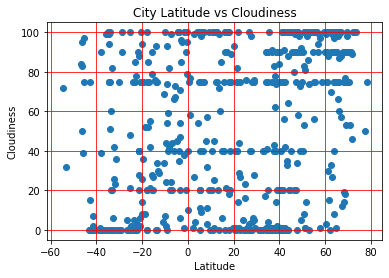

In [17]:
# PLOT DATA FROM ABOVE REFER TO CLASS WORK WEEK 6 COPY THIS EXAMPLE FOR OTHER PLOTS BELOW TO MAKE EASIER

plt.figure(facecolor=(1, 1, 1))
fig = plt.figure()
fig.patch.set_facecolor
plt.scatter(clean_city_data["Lat"],clean_city_data["Cloudiness"] )
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="red")

## Latitude vs. Wind Speed Plot

<Figure size 432x288 with 0 Axes>

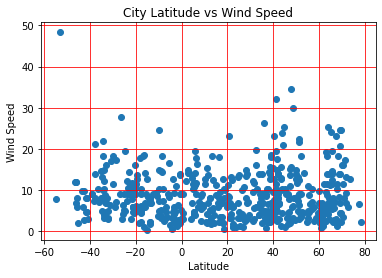

In [18]:
# PLOT DATA FROM ABOVE REFER TO CLASS WORK WEEK 6 COPY THIS EXAMPLE FOR OTHER PLOTS BELOW TO MAKE EASIER

plt.figure(facecolor=(1, 1, 1))
fig = plt.figure()
fig.patch.set_facecolor
plt.scatter(clean_city_data["Lat"],clean_city_data["Wind Speed"] )
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="red")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [34]:
northern_hem = clean_city_data.loc[clean_city_data['Lat'] > 0]

def max_temp(x_values,y_values):

    # Perform a linear regression on temperature vs. latitude
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    print(regress_values)
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    print(line_eq)

    
    # Create Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")

    # Label plot and annotate the line equation
    plt.xlabel('Latitude')
    plt.ylabel('Max Temp')
    plt.annotate(line_eq,(20,15),fontsize=15,color="red")

    # Print r value
    print(f"The r-value is: {rvalue**2}")

    # Show plot
    plt.show()






In [38]:
# Southern Hemisphere

southern_hem = clean_city_data.loc[clean_city_data['Lat'] < 0]

def max_temp(x_values,y_values):

    # Perform a linear regression on temperature vs. latitude
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    print(regress_values)
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    print(line_eq)

    
    # Create Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")

    # Label plot and annotate the line equation
    plt.xlabel('Latitude')
    plt.ylabel('Max Temp')
    plt.annotate(line_eq,(20,15),fontsize=15,color="red")

    # Print r value
    print(f"The r-value is: {rvalue**2}")

    # Show plot
    plt.show()



0      31.419006
2      31.060703
4      63.809637
5      45.348053
7      75.499287
         ...    
546    59.608529
547    38.092408
548    58.426128
550    71.298179
551    51.009247
Name: Lat, Length: 361, dtype: float64
y = -0.9x +95.28
The r-value is: 0.7699748543170012


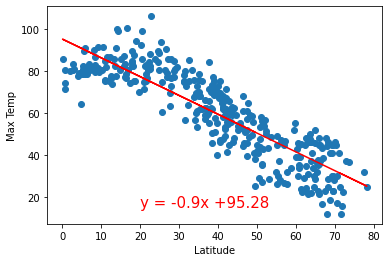

In [35]:
x_values = northern_hem["Lat"]
y_values = northern_hem["Max Temp"]
max_temp(x_values,y_values)



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

1      63.100741
3      80.867440
6      62.444052
8      49.584483
12     63.454344
         ...    
537    82.159170
538    75.888146
540    62.913116
543    63.403829
549    67.170773
Name: Lat, Length: 172, dtype: float64
y = 0.72x +87.94
The r-value is: 0.5642935761414938


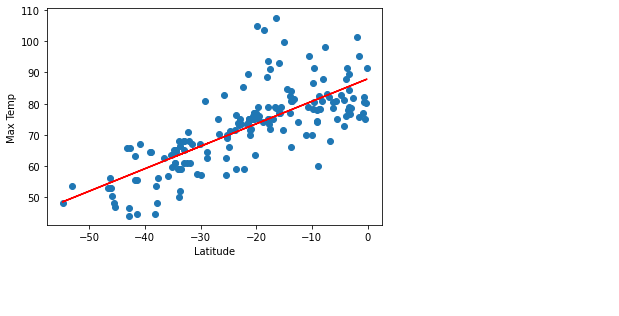

In [39]:
x_values = southern_hem["Lat"]
y_values = southern_hem["Max Temp"]
max_temp(x_values,y_values)


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0      82.029912
2      82.153543
4      70.853693
5      77.223767
7      66.820240
         ...    
546    72.303264
547    79.727290
548    72.711245
550    68.269811
551    75.270402
Name: Lat, Length: 361, dtype: float64
y = 0.31x +60.0
The r-value is: 0.08677642506106664


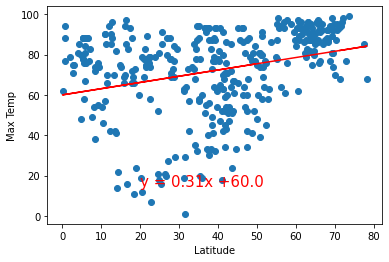

In [43]:
x_values = northern_hem["Lat"]
y_values = northern_hem["Humidity"]
max_temp(x_values,y_values)


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

1      63.166144
3      65.969298
6      63.062534
8      61.033607
12     63.221934
         ...    
537    66.173102
538    65.183686
540    63.136541
543    63.213964
549    63.808296
Name: Lat, Length: 172, dtype: float64
y = 0.11x +67.09
The r-value is: 0.004127742408413008


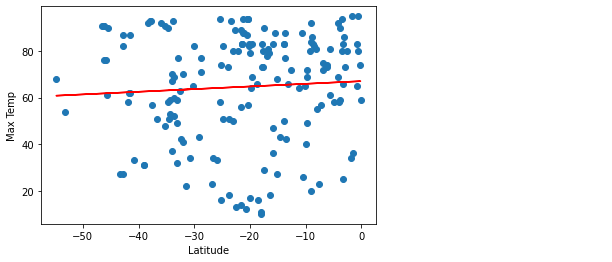

In [40]:
x_values = southern_hem["Lat"]
y_values = southern_hem["Humidity"]
max_temp(x_values,y_values)


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0      71.429695
2      71.638656
4      52.539663
5      63.306354
7      45.722326
         ...    
546    54.989725
547    67.537805
548    55.679295
550    48.172388
551    60.004778
Name: Lat, Length: 361, dtype: float64
y = 0.52x +34.19
The r-value is: 0.07311000205177752


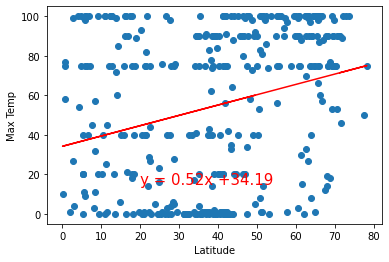

In [36]:
x_values = northern_hem["Lat"]
y_values = northern_hem["Cloudiness"]
max_temp(x_values,y_values)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

1      40.230558
3      50.392651
6      39.854948
8      32.499607
12     40.432809
         ...    
537    51.131487
538    47.544623
540    40.123241
543    40.403916
549    42.558511
Name: Lat, Length: 172, dtype: float64
y = 0.41x +54.44
The r-value is: 0.023179535713883537


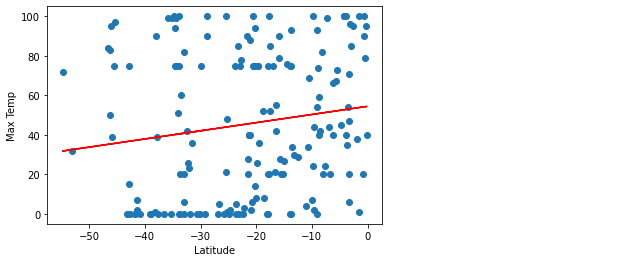

In [41]:
x_values = southern_hem["Lat"]
y_values = southern_hem["Cloudiness"]
max_temp(x_values,y_values)


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

0      9.394992
2      9.405492
4      8.445750
5      8.986787
7      8.103173
         ...   
546    8.568868
547    9.199421
548    8.603520
550    8.226291
551    8.820879
Name: Lat, Length: 361, dtype: float64
y = 0.03x +7.52
The r-value is: 0.008129974475861047


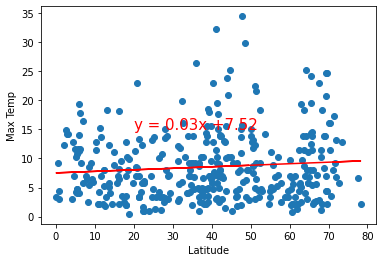

In [37]:
x_values = northern_hem["Lat"]
y_values = northern_hem["Wind Speed"]
max_temp(x_values,y_values)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

1       9.924989
3       7.534063
6      10.013362
8      11.743918
12      9.877403
         ...    
537     7.360230
538     8.204144
540     9.950238
543     9.884201
549     9.377271
Name: Lat, Length: 172, dtype: float64
y = -0.1x +6.58
The r-value is: 0.04901032666955297


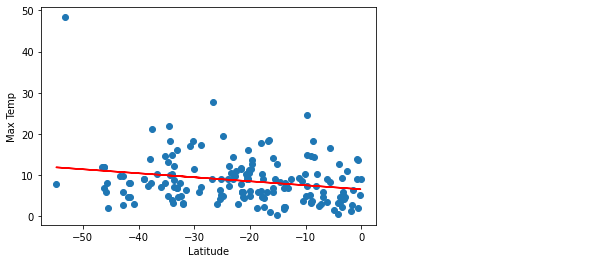

In [42]:
x_values = southern_hem["Lat"]
y_values = southern_hem["Wind Speed"]
max_temp(x_values,y_values)
